# Predicting the predictions

RTE provides an API to access the predictions of the productions of the different types of energy sources.

The API is available at the following URL: https://data.rte-france.com/catalog/-/api/generation/Generation-Forecast/v2.1



In [2]:
import pandas as pd
from energy_forecast import ROOT_DIR
from energy_forecast.production_forecast import ProductionForecastAPI

env_file = ROOT_DIR / ".env"
sun_flux_file = ROOT_DIR / "data" / "silver" / "group_mean_sun.csv"
wind_speed_file = ROOT_DIR / "data" / "silver" / "group_means_wind.csv"

with env_file.open("r") as f:
    secret = f.readline().strip().split("=", 1)[1]

## First : reading the Weather Data

This step requires the two files in the Data folder.

In [3]:
data_sun = pd.read_csv(sun_flux_file, index_col=0)
data_sun["time"] = pd.to_datetime(data_sun["time"])
data_sun["step"] = pd.to_timedelta(data_sun["step"])
data_sun["valid_time"] = (
    data_sun["time"] + data_sun["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_sun["step"] >= pd.Timedelta("1D")) & (
    data_sun["step"] < pd.Timedelta("2D")
)
data_sunD1 = data_sun.loc[mask_D1]
data_sunD1_regions = data_sunD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="ssrd"
)
data_sunD1_regions.index = data_sunD1_regions.index.tz_localize("UTC").tz_convert(
    "Europe/Paris"
)
data_sunD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 05:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_wind = pd.read_csv(wind_speed_file, index_col=False)
data_wind["time"] = pd.to_datetime(data_wind["time"])
data_wind["step"] = pd.to_timedelta(data_wind["step"])
data_wind["valid_time"] = (
    data_wind["time"] + data_wind["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_wind["step"] >= pd.Timedelta("1D")) & (
    data_wind["step"] < pd.Timedelta("2D")
)
data_windD1 = data_wind.loc[mask_D1]
data_windD1_regions = data_windD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="si10"
)
data_windD1_regions.index = data_windD1_regions.index.tz_localize("UTC").tz_convert(
    "Europe/Paris"
)

data_windD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,3.705175,4.568276,3.618184,5.089186,2.738070,5.581255,7.098129,6.486237,3.067982,5.653931,4.084127,6.189727,5.536256
2022-02-02 02:00:00+01:00,3.642379,4.467238,3.637520,4.925655,3.236441,5.360667,6.929116,6.696957,2.970035,5.337131,4.211257,6.436513,5.553952
2022-02-02 03:00:00+01:00,3.565388,4.325107,3.703880,4.928397,3.292210,5.261508,6.651305,6.627742,2.861727,5.112169,4.206979,6.645758,5.340007
2022-02-02 04:00:00+01:00,3.477547,4.289974,3.734176,4.882295,2.995472,5.266212,6.441283,6.488635,2.668218,5.075777,4.100137,6.682411,5.293652
2022-02-02 05:00:00+01:00,3.476616,4.251610,3.752356,4.757608,2.792265,5.068052,6.376684,6.372849,2.510890,5.077017,3.887392,6.527510,5.267478


<Axes: >

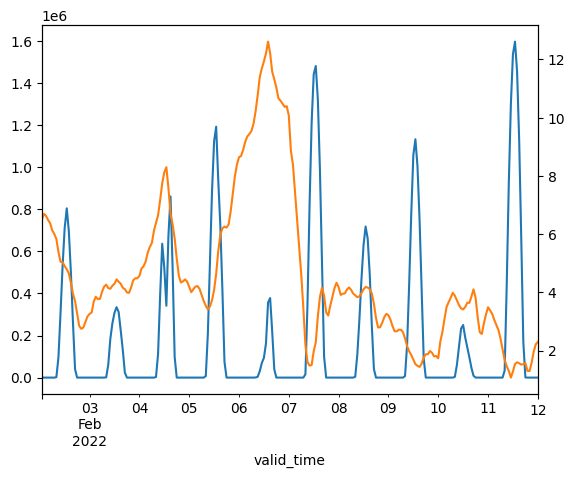

In [5]:
data_sunD1_regions["Normandie"].iloc[0:240].plot()

data_windD1_regions["Normandie"].iloc[0:240].plot(secondary_y=True)

## Accessing the prediction of the production

RTE provides the prevision at D+1 of the production of the different types of energy sources.

In [6]:
prod_for_client = ProductionForecastAPI(secret)
data_solar = prod_for_client.get_raw_data(
    production_type="SOLAR",
    type="D-1",
    start_date=data_sunD1_regions.index[0],
    end_date=data_sunD1_regions.index[-1],
)

The duration of the forecast cannot be more than 21 days. Fixing the end date.


In [7]:
prediction_solar = pd.json_normalize(data_solar["forecasts"], ["values"]).set_index(
    "start_date"
)[["value"]]
prediction_solar.index = pd.to_datetime(prediction_solar.index, utc=True).tz_convert(
    "Europe/Paris"
)
prediction_solar.sort_index(inplace=True)
prediction_solar

,value
start_date,
2022-02-02 00:00:00+01:00,0.0
2022-02-02 01:00:00+01:00,0.0
2022-02-02 02:00:00+01:00,0.0
2022-02-02 03:00:00+01:00,0.0
2022-02-02 04:00:00+01:00,0.0
...,...
2022-02-21 19:00:00+01:00,0.0
2022-02-21 20:00:00+01:00,0.0
2022-02-21 21:00:00+01:00,0.0


Text(0.5, 1.0, 'Solar Forecasted production vs Mean Sun Flux')

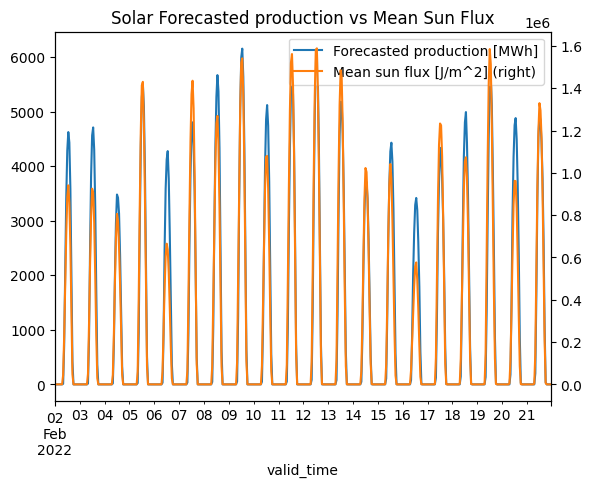

In [8]:
ax = prediction_solar.plot(y="value", label="Forecasted production [MWh]")

data_sunD1_regions.loc[prediction_solar.index[0] : prediction_solar.index[-1]].mean(
    axis=1
).plot(secondary_y=True, ax=ax, label="Mean sun flux [J/m^2]", legend=True)

ax.set_title("Solar Forecasted production vs Mean Sun Flux")

In [9]:
data_eolien = prod_for_client.get_raw_data(
    production_type="WIND_ONSHORE",
    type="D-1",
    start_date=data_sunD1_regions.index[0],
    end_date=data_sunD1_regions.index[-1],
)
prediction_eolien = pd.json_normalize(
    data_eolien["forecasts"], ["values"], "production_type"
).set_index("start_date")
prediction_eolien.index = pd.to_datetime(prediction_eolien.index)
prediction_eolien.sort_index(inplace=True)
prediction_eolien = prediction_eolien[["value"]]

The duration of the forecast cannot be more than 21 days. Fixing the end date.


Text(0.5, 1.0, 'Eolien Forecasted production vs Mean Wind speed')

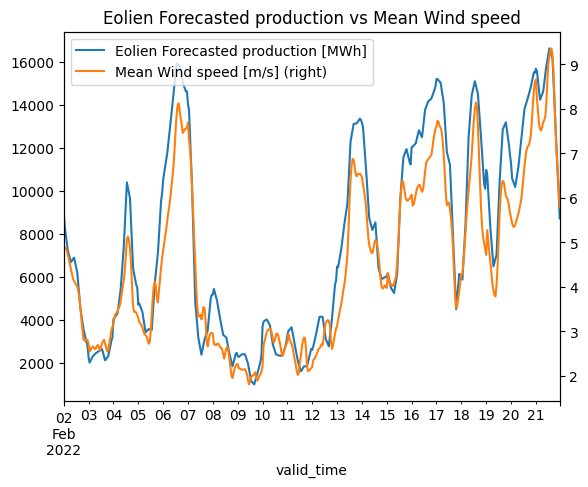

In [10]:
ax = prediction_eolien.plot(
    y="value", label="Eolien Forecasted production [MWh]", legend=True
)

data_windD1_regions.loc[prediction_eolien.index[0] : prediction_eolien.index[-1]].mean(
    axis=1
).plot(secondary_y=True, ax=ax, label="Mean Wind speed [m/s]", legend=True)

ax.set_title("Eolien Forecasted production vs Mean Wind speed")

## Bulk download

The API limits the number of days to 21. To get the data for the whole year, we need to download the data in bulk.

In [11]:
number_of_days = 365
start_date = data_sunD1_regions.index[0]
max_duration_call = 20
last_date = start_date + pd.Timedelta(f"{number_of_days}D")
last_date = data_sunD1_regions.index[-1]


def bulk_production_forecast_download(
    number_of_days: int,
    start_date: pd.Timestamp,
    last_date: pd.Timestamp,
    max_duration_call: int = 20,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    values_SOLAR = []
    values_EOLIEN = []
    while start_date < last_date:
        print((last_date - start_date).days)
        end_date = start_date + pd.Timedelta(f"{max_duration_call}D")
        if end_date > last_date:
            end_date = last_date + pd.Timedelta("2D")
        data_solar = prod_for_client.get_raw_data(
            production_type="SOLAR",
            type="D-1",
            start_date=start_date,
            end_date=end_date,
        )
        values_SOLAR.extend(data_solar["forecasts"][0]["values"])
        data_solar = prod_for_client.get_raw_data(
            production_type="WIND_ONSHORE",
            type="D-1",
            start_date=start_date,
            end_date=end_date,
        )
        values_EOLIEN.extend(data_solar["forecasts"][0]["values"])
        end_date = data_solar["forecasts"][0]["end_date"]
        start_date = pd.Timestamp(end_date)

    prediction_solar = pd.DataFrame.from_records(values_SOLAR).set_index("start_date")[
        ["value"]
    ]
    prediction_solar.index = pd.to_datetime(
        prediction_solar.index, utc=True
    ).tz_convert("Europe/Paris")
    prediction_solar.sort_index(inplace=True)
    prediction_eolien = pd.DataFrame.from_records(values_EOLIEN).set_index(
        "start_date"
    )[["value"]]
    prediction_eolien.index = pd.to_datetime(
        prediction_eolien.index, utc=True
    ).tz_convert("Europe/Paris")
    prediction_eolien.sort_index(inplace=True)
    return prediction_solar, prediction_eolien


prediction_solar, prediction_eolien = bulk_production_forecast_download(
    number_of_days, start_date, last_date
)

796
778
759
739
719
699
679
659
639
619
599
579
559
539
520
501
482
463
444
425
406
387
367
347
327
307
287
267
247
227
207
187
167
148
129
110
91
72
53
34
15


<Axes: xlabel='start_date'>

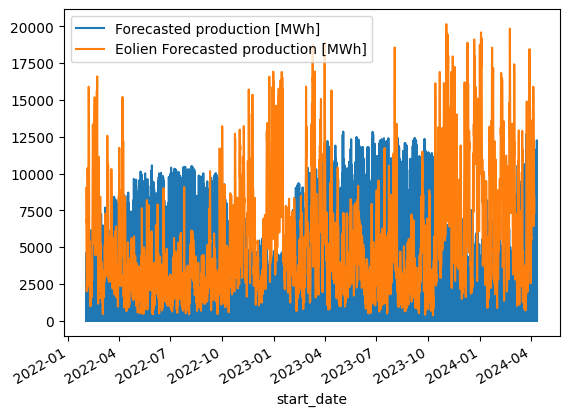

In [12]:
ax = prediction_solar.plot(y="value", label="Forecasted production [MWh]")
prediction_eolien.plot(y="value", label="Eolien Forecasted production [MWh]", ax=ax)

In [15]:
data_predictions_production = pd.concat(
    [prediction_solar, prediction_eolien],
    axis=1,
    keys=["FORECAST_D1_SOLAR", "FORECAST_D1_EOLIEN"],
).droplevel(1, axis=1)
data_predictions_production.to_csv(
    ROOT_DIR / "data" / "silver" / "forecasted_production.csv"
)

# modeling

In [64]:
from sklearn.linear_model import LinearRegression

## prediction of the solar production

In [65]:
first_date = prediction_solar.index[0]
last_date = prediction_solar.index[-1]
X_sun = data_sunD1_regions.loc[first_date:last_date]

X_cols = X_sun.columns
Y_col = prediction_solar.columns[0]

X_sun, Y_sun = X_sun.align(prediction_solar, axis=0, join="inner")
print(X_sun.shape, Y_sun.shape)

(8366, 13) (8366, 1)


In [66]:
model_sun = LinearRegression(positive=True, fit_intercept=False)
model_sun.fit(X_sun, Y_sun)

LinearRegression(fit_intercept=False, positive=True)

In [67]:
Ypred = model_sun.predict(X_sun)

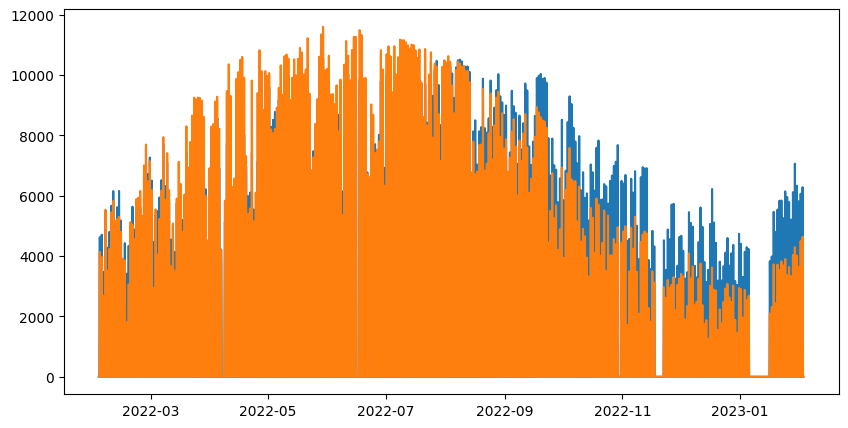

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Y_sun)
ax.plot(Y_sun.index, Ypred)

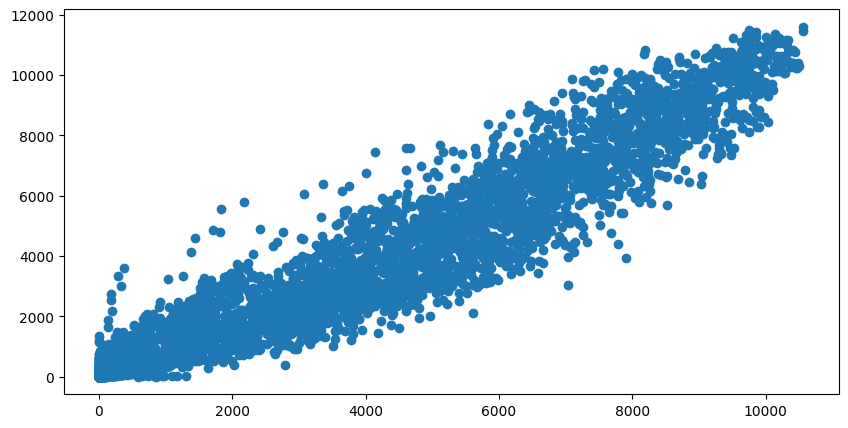

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(Y_sun, Ypred)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(Y_sun, Ypred), r2_score(Y_sun, Ypred)

(np.float64(513299.5719495245), 0.9439085408104981)

## Prediction of the Eolien production

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
first_date = prediction_eolien.index[0]
last_date = prediction_eolien.index[-1]
X_wind = data_windD1_regions.loc[first_date:last_date]

X_wind, Y_wind = X_wind.align(prediction_eolien, axis=0, join="inner")
X_wind = PolynomialFeatures(degree=2).fit_transform(X_wind)

print(X_wind.shape, Y_wind.shape)

(8254, 105) (8254, 1)


In [73]:
model_wind = LinearRegression(positive=True, fit_intercept=False)

model_wind.fit(X_wind, Y_wind)

LinearRegression(fit_intercept=False, positive=True)

In [74]:
Y_windpred = model_wind.predict(X_wind)

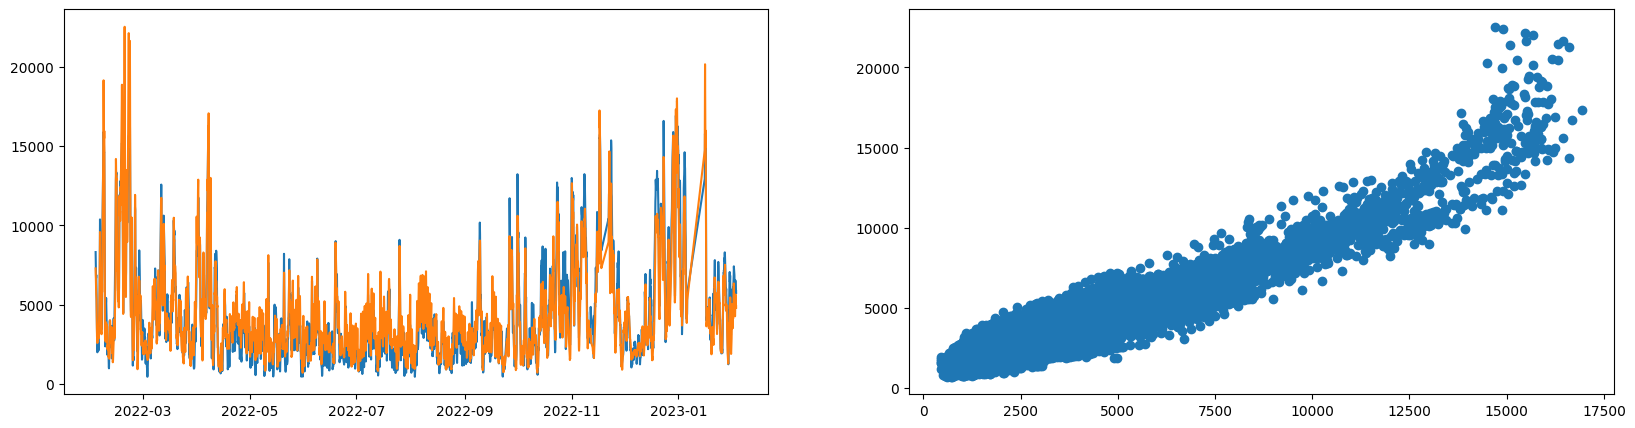

In [75]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(Y_wind)
ax1.plot(Y_wind.index, Y_windpred)
ax2.scatter(Y_wind, Y_windpred)

In [60]:
print(mean_squared_error(Y_wind, Y_windpred), r2_score(Y_wind, Y_windpred))

1146282.8665348438 0.9051639811703396


# Conclusion

We can see that, using the historical weather data, we can predict the prediction of the production of the different solar energy source.

## TODO
- [ ] the same for wind energy
- [ ] Run on longer periods
- [ ] observe the evolution with time
